### 对数几率回归

In [27]:
import numpy as np

In [2]:
def sigmoid(x):
    z = 1 / (1 + np.exp(-x))
    return z

In [3]:
def initialize_params(dims):
    W = np.zeros((dims, 1))
    b = 0
    return W, b

In [4]:
### 定义逻辑回归模型主体
def logistic(X, y, W, b):
    '''
    输入：
    X: 输入特征矩阵
    y: 输出标签向量
    W: 权值参数
    b: 偏置参数
    输出：
    a: 逻辑回归模型输出
    cost: 损失
    dW: 权值梯度
    db: 偏置梯度
    '''
    # 训练样本量
    num_train = X.shape[0]
    # 训练特征数
    num_feature = X.shape[1]
    # 逻辑回归模型输出
    a = sigmoid(np.dot(X, W) + b)
    # 交叉熵损失
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    # 权值梯度
    dW = np.dot(X.T, (a-y))/num_train
    # 偏置梯度
    db = np.sum(a-y)/num_train
    # 压缩损失数组维度
    cost = np.squeeze(cost) 
    return a, cost, dW, db

In [5]:
### 定义逻辑回归模型训练过程
def logistic_train(X, y, learning_rate, epochs):
    '''
    输入：
    X: 输入特征矩阵
    y: 输出标签向量
    learning_rate: 学习率
    epochs: 训练轮数
    输出：
    cost_list: 损失列表
    params: 模型参数
    grads: 参数梯度
    '''
    # 初始化模型参数
    W, b = initialize_params(X.shape[1])  
    # 初始化损失列表
    cost_list = []  
    
    # 迭代训练
    for i in range(epochs):
        # 计算当前次的模型计算结果、损失和参数梯度
        a, cost, dW, db = logistic(X, y, W, b)    
        # 参数更新
        W = W -learning_rate * dW
        b = b -learning_rate * db        
        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)   
        # 打印训练过程中的损失 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 
               
    # 保存参数
    params = {            
        'W': W,            
        'b': b
    }        

    # 保存梯度
    grads = {            
        'dW': dW,            
        'db': db
    }                
    return cost_list, params, grads

In [6]:
### 定义预测函数
def predict(X, params):
    '''
    输入：
    X: 输入特征矩阵
    params: 训练好的模型参数
    输出：
    y_prediction: 转换后的模型预测值
    '''
    # 模型预测值
    y_prediction = sigmoid(np.dot(X, params['W']) + params['b'])
    # 基于分类阈值对概率预测值进行类别转换
    for i in range(len(y_prediction)):        
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
            
    return y_prediction

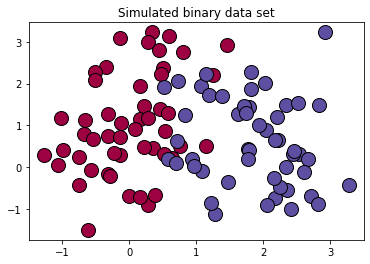

In [8]:
# 导入matplotlib绘图库
import matplotlib.pyplot as plt
# 导入生成分类数据函数
# from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets import make_classification
# 生成100*2的模拟二分类数据集
X, labels = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2)
# 设置随机数种子
rng = np.random.RandomState(2)
# 对生成的特征数据添加一组均匀分布噪声
X += 2 * rng.uniform(size=X.shape)
# 标签类别数
unique_lables = set(labels)
# 根据标签类别数设置颜色
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
# 绘制模拟数据的散点图
for k,col in zip(unique_lables, colors):
    x_k=X[labels==k]
    plt.plot(x_k[:,0],x_k[:,1],'o',markerfacecolor=col,markeredgecolor="k",
             markersize=14)
plt.title('Simulated binary data set')
plt.show();

In [9]:
print(X.shape, labels.shape)

(100, 2) (100,)


In [10]:
labels = labels.reshape((-1, 1))
data = np.concatenate((X, labels), axis=1)
print(data.shape)

(100, 3)


In [11]:
# 训练集与测试集的简单划分
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)


In [12]:
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

epoch 0 cost 0.693147
epoch 100 cost 0.554066
epoch 200 cost 0.480953
epoch 300 cost 0.434738
epoch 400 cost 0.402395
epoch 500 cost 0.378275
epoch 600 cost 0.359468
epoch 700 cost 0.344313
epoch 800 cost 0.331783
epoch 900 cost 0.321216


In [13]:
params

{'W': array([[ 1.55740577],
        [-0.46456883]]),
 'b': -0.594451885315136}

In [14]:
y_pred = predict(X_test, params)
print(y_pred)

[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [15]:
sigmoid(np.dot(X_test, params['W']) + params['b'])

array([[0.27936388],
       [0.92347241],
       [0.90814155],
       [0.24192851],
       [0.94789076],
       [0.98545445],
       [0.29242059],
       [0.06128463],
       [0.95821867],
       [0.46214622]])

In [16]:
from sklearn.metrics import accuracy_score, classification_report
# print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [19]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):
        for j in range(len(y_pred)):
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1
            
    accuracy_score = correct_count / len(y_test)
    return accuracy_score

accuracy_score_test = accuracy(y_test, y_pred)
print(accuracy_score_test)

1.0


In [20]:
y_train_pred = predict(X_train, params)
accuracy_score_train = accuracy(y_train, y_train_pred)
print(accuracy_score_train)

0.8888888888888888


In [21]:
X_train[1][1]

0.31055924594920103

In [22]:
X_train[:5]

array([[ 2.17221697, -0.73380144],
       [ 2.54116921,  0.31055925],
       [-0.00718884, -0.70554359],
       [-0.31285288, -0.17275221],
       [-0.67290531,  0.79310561]])

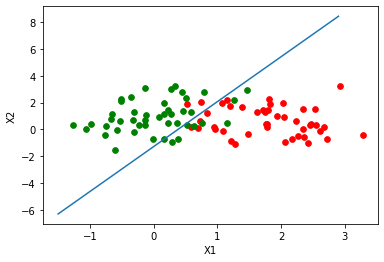

In [24]:
### 绘制逻辑回归决策边界
def plot_decision_boundary(X_train, y_train, params):
    '''
    输入：
    X_train: 训练集输入
    y_train: 训练集标签
    params：训练好的模型参数
    输出：
    决策边界图
    '''
    # 训练样本量
    n = X_train.shape[0]
    # 初始化类别坐标点列表
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    # 获取两类坐标点并存入列表
    for i in range(n):
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
    # 创建绘图
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制两类散点，以不同颜色表示
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    # 取值范围
    x = np.arange(-1.5, 3, 0.1)
    # 决策边界公式
    y = (-params['b'] - params['W'][0] * x) / params['W'][1]
    # 绘图
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
plot_decision_boundary(X_train, y_train, params)

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

D:\software\installations\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

